# Introduction (The Capital Asset Pricing Model)
Most exercises in this Chapter are pretty simple. I only tackle more complex ones using Pandas, SciPy, and Matplotlib.

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.ticker as mtick

### Exercise 1.11
Answer from the textbook: 99.89%

In [2]:
assets = 1.
mu = .006 * assets
sigma = .015 * assets
equity = .04 * assets
distr = norm(loc=mu, scale=sigma)
print(f'Probability that the bank will have a positive equity at the end of the year: {1 - distr.cdf(-equity):.2%}')

Probability that the bank will have a positive equity at the end of the year: 99.89%


### Exercise 1.15

In [3]:
mu1 = .08
sigma1 = .14
mu2 = .12
sigma2 = .2
rho = .3
weights = np.arange(0., 1.1, .1)

In [4]:
df = pd.DataFrame(np.column_stack((weights, 1 - weights)), columns = ['\u03C91', '\u03C92'])
df['\u03BCP'] = df.iloc[:,0] * mu1 + df.iloc[:,1] * mu2
df['\u03C3P'] = np.sqrt(np.square(df.iloc[:,0]) * sigma1**2 + np.square(df.iloc[:,1]) * sigma2**2
                        + 2. * rho * df.iloc[:,0] * df.iloc[:,1] * sigma1 * sigma2)

In [5]:
df

,ω1,ω2,μP,σP
0,0.0,1.0,0.120,0.200000
1,0.1,0.9,0.116,0.184684
2,0.2,0.8,0.112,0.170505
3,0.3,0.7,0.108,0.157772
4,0.4,0.6,0.104,0.146860
5,0.5,0.5,0.100,0.138203
6,0.6,0.4,0.096,0.132242
7,0.7,0.3,0.092,0.129352
8,0.8,0.2,0.088,0.129738
9,0.9,0.1,0.084,0.133372


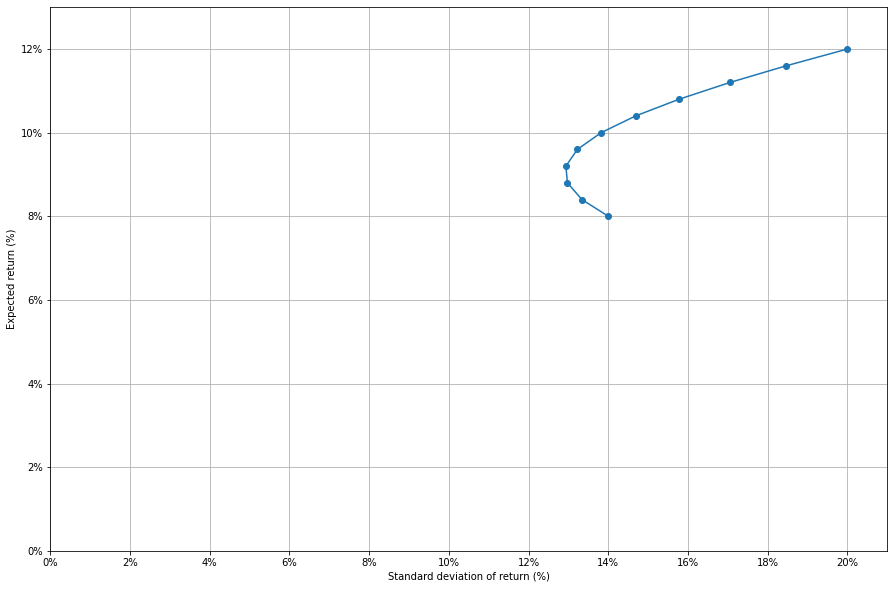

In [6]:
ax = df.plot(3, 2, figsize=(15,10), xlim=(0, df.iloc[:,3].max() + .01), ylim=(0, df.iloc[:,2].max() + .01),
             xlabel='Standard deviation of return (%)', ylabel='Expected return (%)', style='-o',
             xticks=np.arange(0, .21, .02), grid=True, legend=False)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1, 0))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, 0))

### Exercise 1.16

In [7]:
mu_mkt = .12
risk_free_rate = .07
sigma_mkt = .15
mu_p1 = .1
mu_p2 = .2

In [9]:
w_mkt_p1 = (mu_p1 - risk_free_rate) / (mu_mkt - risk_free_rate)
w_mkt_p2 = (mu_p2 - risk_free_rate) / (mu_mkt - risk_free_rate)
sigma_p1 = w_mkt_p1 * sigma_mkt
sigma_p2 = w_mkt_p2 * sigma_mkt
print(f'\u03C3P1: {sigma_p1:.2%}\n\u03C3P2: {sigma_p2:.2%}')

σP1: 9.00%
σP2: 39.00%


### Exercise 1.17

In [22]:
mu = .8    # in percetage points of assets
sigma = 2  # idem
conf_levs = [.99, .999]

for conf_lev in conf_levs:
    print(f'For a confidence level of {conf_lev:.1%} the bank needs to hold equity equivallent to '
          f'{norm.ppf(conf_lev) * sigma - mu:.2f}% of its assets')

For a confidence level of 99.0% the bank needs to hold equity equivallent to 3.85% of its assets
For a confidence level of 99.9% the bank needs to hold equity equivallent to 5.38% of its assets
